In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from datetime import datetime
import seaborn as sns


In [4]:
data=pd.read_csv('../data/raw_analyst_ratings.csv')
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
data.shape


(1407328, 6)

In [6]:
data.info

<bound method DataFrame.info of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  

In [7]:
# Calculate the length of each headline
data['headline_length'] = data['headline'].apply(len)

# Obtain basic statistics for headline lengths
headline_stats = data['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [57]:
# Count the number of articles per publisher
publisher_counts = data['publisher'].value_counts()
print(publisher_counts.head(20))


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


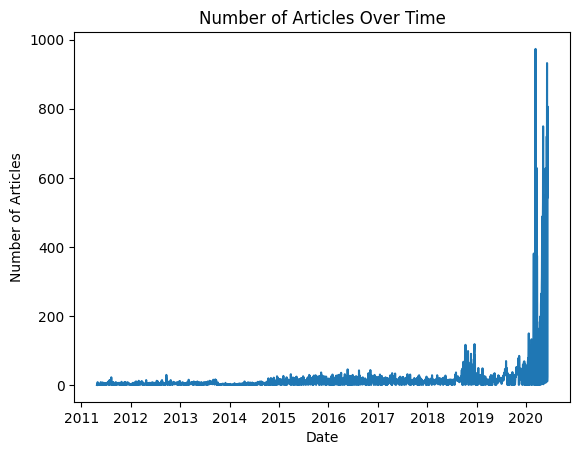

In [58]:
# Convert the 'date' column to datetime, allowing pandas to infer the format
# errors='coerce' will convert any non-convertible values to NaT (Not a Time) rather than raising an error.

data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Count the number of articles per day
daily_counts = data['date'].dt.date.value_counts().sort_index()
print(daily_counts)

# Plot articles over time
data['date'].dt.date.value_counts().sort_index().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Over Time')
plt.show()


In [10]:
# Function to get the sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity



In [11]:
# Apply the sentiment analysis
data['sentiment'] = data['headline'].apply(get_sentiment)



In [60]:
# Classify the sentiment as positive, negative, or neutral
data['sentiment_label'] = data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display sentiment analysis results
print(data[['headline', 'sentiment', 'sentiment_label']].head(20))

                                             headline  sentiment  \
0             Stocks That Hit 52-Week Highs On Friday     0.0000   
1          Stocks That Hit 52-Week Highs On Wednesday     0.0000   
2                       71 Biggest Movers From Friday     0.0000   
3        46 Stocks Moving In Friday's Mid-Day Session     0.0000   
4   B of A Securities Maintains Neutral on Agilent...     0.2960   
5   CFRA Maintains Hold on Agilent Technologies, L...    -0.1280   
6   UBS Maintains Neutral on Agilent Technologies,...     0.0000   
7   Agilent Technologies shares are trading higher...     0.2960   
8   Wells Fargo Maintains Overweight on Agilent Te...    -0.1280   
9          10 Biggest Price Target Changes For Friday     0.0000   
10    30 Stocks Moving in Friday's Pre-Market Session     0.0000   
11  SVB Leerink Maintains Outperform on Agilent Te...     0.0000   
12  8 Stocks Moving In Thursday's After-Hours Session     0.0000   
13  Agilent Technologies shares are trading high

C:\Users\ftesfaye\AppData\Local\Temp\ipykernel_13116\2707920261.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


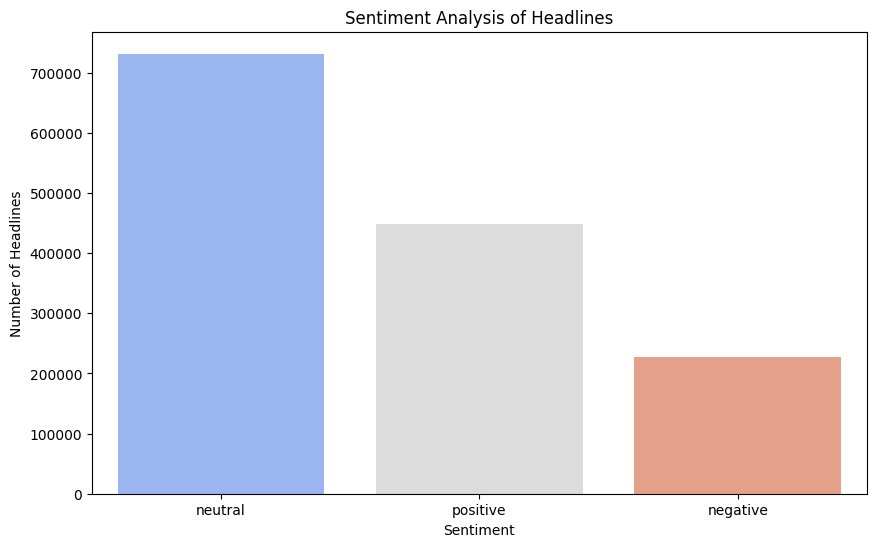

In [61]:
# Count the occurrences of each sentiment label
sentiment_counts = data['sentiment_label'].value_counts()

# Plotting the sentiment counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Analysis of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')
plt.show()

In [39]:
import nltk

# Re-download the necessary resources
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('punkt_tab')





[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ftesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ftesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ftesfaye\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [40]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define stop words
stop_words = set(stopwords.words('english'))

# Tokenization and stopword removal
def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lower case and tokenize
    tokens = [word for word in tokens if word.isalnum()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Apply preprocessing to the headlines
data['tokens'] = data['headline'].apply(preprocess)


In [41]:
# Flatten the list of tokens and count the frequency
all_words = [word for tokens in data['tokens'] for word in tokens]
word_freq = Counter(all_words)

# Print the most common keywords
common_words = word_freq.most_common(20)
print("Most common keywords or phrases:")
for word, freq in common_words:
    print(f"{word}: {freq} times")






Most common keywords or phrases:
stocks: 161702 times
vs: 138835 times
eps: 128801 times
est: 122289 times
shares: 114140 times
reports: 108688 times
update: 91645 times
market: 91080 times
earnings: 87183 times
sales: 79528 times
top: 78493 times
benzinga: 74466 times
pt: 73059 times
announces: 66531 times
price: 64217 times
buy: 63928 times
downgrades: 61942 times
trading: 61146 times
raises: 57793 times
upgrades: 56802 times


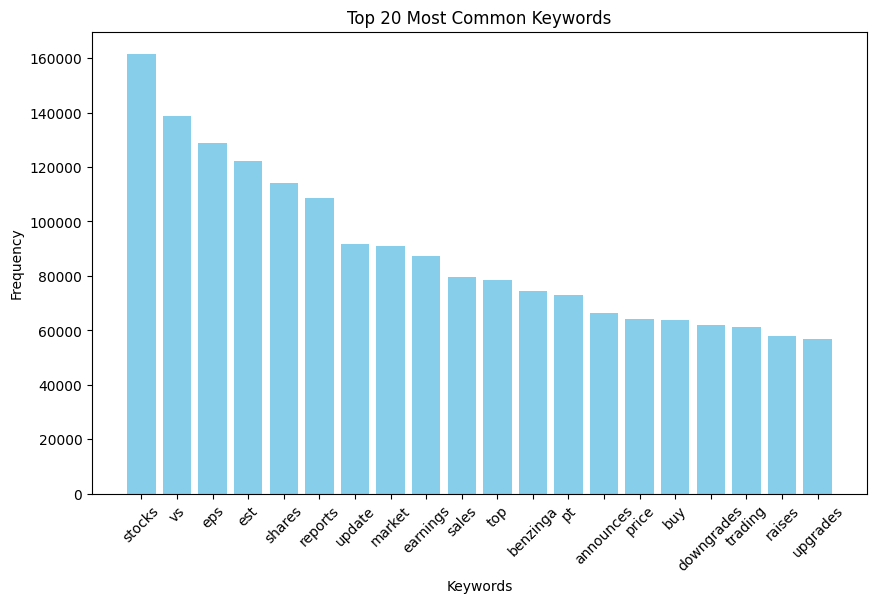

In [66]:
# Visualization
words, freqs = zip(*common_words)  # Unpack words and frequencies

plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(words, freqs, color='skyblue')  # Create a bar chart
plt.xlabel('Keywords')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.title('Top 20 Most Common Keywords')  # Chart title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the chart

Time Series Analysis:

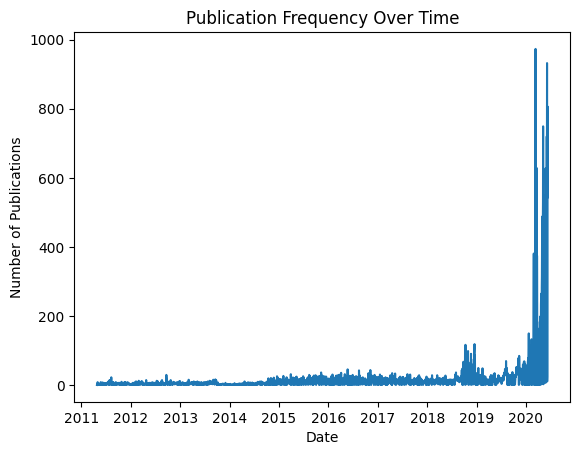

In [65]:

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['minute'] = data['date'].dt.minute
data['weekday'] = data['date'].dt.weekday  # Monday=0, Sunday=6

# Group by date to count publications per day
daily_counts = data.groupby(data['date'].dt.date).size()
# Plot the publication frequency over time
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()


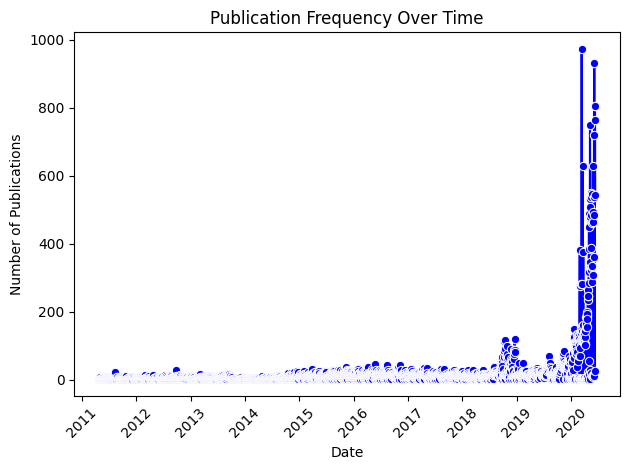

In [68]:

sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o', color='b')  # Create a line plot
plt.title('Publication Frequency Over Time')  # Chart title
plt.xlabel('Date')  # Label for x-axis
plt.ylabel('Number of Publications')  # Label for y-axis
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the chart

Spikes in Article Publications:
date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, dtype: int64


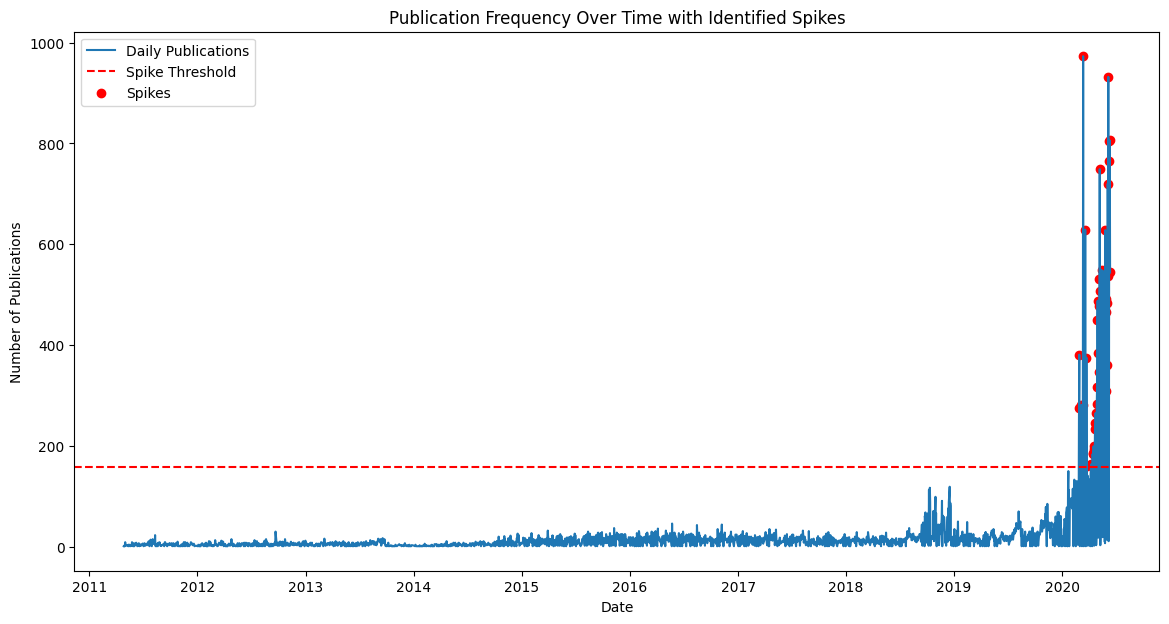

In [71]:
threshold = daily_counts.mean() + 2 * daily_counts.std()
spikes = daily_counts[daily_counts > threshold]

print("Spikes in Article Publications:")
print(spikes)

# Plot the publication frequency over time
plt.figure(figsize=(14, 7))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, label='Daily Publications')
plt.axhline(y=threshold, color='red', linestyle='--', label='Spike Threshold')
plt.scatter(spikes.index, spikes.values, color='red', label='Spikes')
plt.title('Publication Frequency Over Time with Identified Spikes')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.legend()
plt.show()

Publisher Analysis:


Top Publishers by Number of Contributions:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


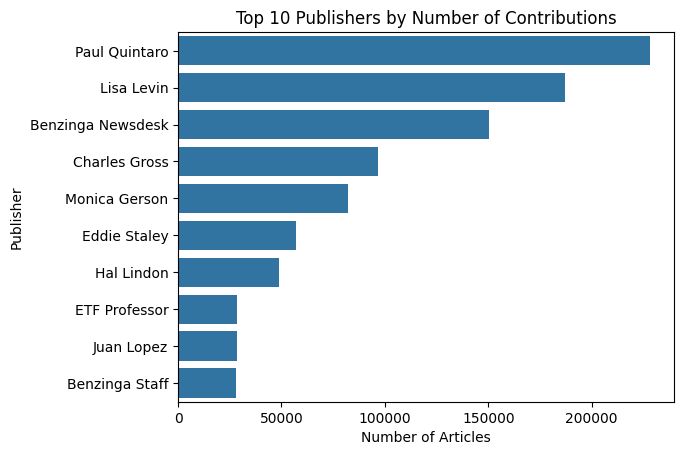

In [72]:
# Step 1: Count Contributions by Publisher
publisher_counts = data['publisher'].value_counts()
print("Top Publishers by Number of Contributions:")
print(publisher_counts.head(10))  # Display top 10 publishers

sns.barplot(x=publisher_counts.head(10).values, y=publisher_counts.head(10).index)
plt.title('Top 10 Publishers by Number of Contributions')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

In [79]:
# Step 2: Analyze Types of News (based on headline keywords or stock symbols)
# For simplicity, we'll look at the unique stock symbols reported by each publisher
publisher_stock_analysis = data.groupby('publisher')['stock'].nunique()
top_publishers_by_stocks = publisher_stock_analysis.sort_values(ascending=False).head(10)
print("\nTop 10 Publishers by Number of Unique Stocks Reported:")
print(top_publishers_by_stocks)


Top 10 Publishers by Number of Unique Stocks Reported:
publisher
Paul Quintaro        4703
Lisa Levin           4640
Hal Lindon           4474
Eddie Staley         4466
Charles Gross        4181
Benzinga Newsdesk    4049
Monica Gerson        4012
Benzinga Staff       3233
Allie Wickman        3009
Benzinga_Newsdesk    2924
Name: stock, dtype: int64


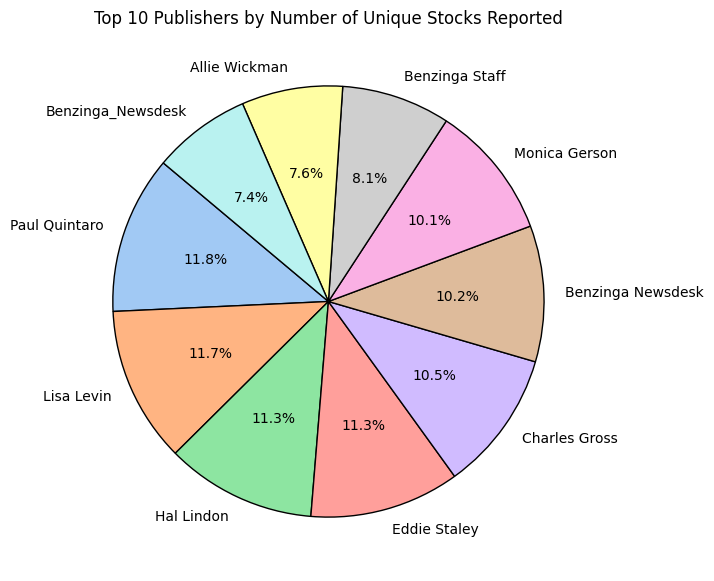

In [80]:
# Plotting the pie chart
plt.figure(figsize=(10, 7))
top_publishers_by_stocks.plot.pie(
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('pastel'),
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Top 10 Publishers by Number of Unique Stocks Reported')
plt.ylabel('')  # Remove the y-label for aesthetics
plt.show()

In [81]:
# Step 3: Email Domain Analysis (if applicable)
# Extract domains if publisher names contain email addresses
data['domain'] = data['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else None)
domain_counts = data['domain'].value_counts(dropna=True)
print("\nTop Domains by Number of Contributions:")
print(domain_counts.head(10))  # Display top 10 domains



Top Domains by Number of Contributions:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


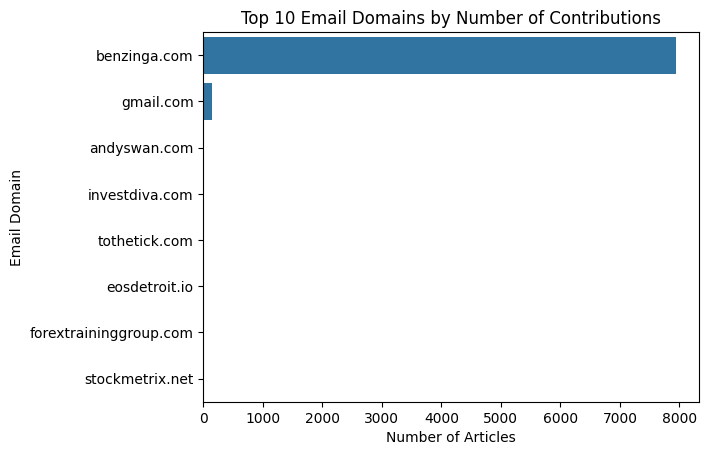

In [82]:


sns.barplot(x=domain_counts.head(10).values, y=domain_counts.head(10).index)
plt.title('Top 10 Email Domains by Number of Contributions')
plt.xlabel('Number of Articles')
plt.ylabel('Email Domain')
plt.show()